In [1]:
from langgraph.graph import Graph

In [3]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(model="llama3-70b-8192")

In [6]:
llm.invoke("hi how are you?")

AIMessage(content="Hi! I'm just a language model, so I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have. How can I help you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 15, 'total_tokens': 64, 'completion_time': 0.14142521, 'prompt_time': 0.003533486, 'queue_time': 0.032225893, 'total_time': 0.144958696}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_753a4aecf6', 'finish_reason': 'stop', 'logprobs': None}, id='run-5c30e7e2-c3cc-4a40-94dd-f1c777846478-0', usage_metadata={'input_tokens': 15, 'output_tokens': 49, 'total_tokens': 64})

In [7]:
llm.invoke("hi how are you?").content

"Hi! I'm just a language model, so I don't have feelings or emotions like humans do. However, I'm functioning properly and ready to help you with any questions or tasks you have! How can I assist you today?"

In [26]:
def function1(input):
    llm=ChatGroq(model="llama3-70b-8192")
    response=llm.invoke("hi how are you?").content
    return response
    

In [27]:
function1("hi")

"Hi! I'm just a language model, so I don't have feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you might have. How can I assist you today?"

In [28]:
def function2(input):
    upper_string=input.upper()
    return upper_string
    

In [54]:
workflow=Graph()

In [55]:
workflow.add_node("llm",function1)
workflow.add_node("upper_string",function2)

In [56]:
workflow.add_edge("llm","upper_string")

In [57]:
workflow.set_entry_point("llm")

In [59]:
workflow.set_finish_point("upper_string")

In [60]:
app=workflow.compile()

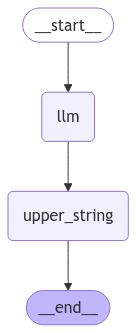

In [61]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [62]:
app.invoke("hi")

"HI! I'M JUST A LANGUAGE MODEL, SO I DON'T HAVE EMOTIONS OR FEELINGS LIKE HUMANS DO, BUT I'M FUNCTIONING PROPERLY AND READY TO ASSIST YOU WITH ANY QUESTIONS OR TASKS YOU MAY HAVE. HOW CAN I HELP YOU TODAY?"

In [63]:
app.invoke("hi can you tell me about the first prime minister of india?")

"HI! I'M DOING WELL, THANKS FOR ASKING. I'M A LARGE LANGUAGE MODEL, SO I DON'T HAVE EMOTIONS LIKE HUMANS DO, BUT I'M ALWAYS HAPPY TO CHAT WITH YOU AND HELP WITH ANY QUESTIONS OR TOPICS YOU'D LIKE TO DISCUSS. HOW ABOUT YOU? HOW'S YOUR DAY GOING?"